## EDA student performance indicator 

## Problem statement 
* this project understand how the students perofmrnace (test score) is affected by other varibale such as gender, ethnicity,parental level of education, lunch and test preparation course 

Data Collection 
* The data consists of 8 column and 1000 rows

Dataset information
* Gender : gender of students - Male or female 
* Race/ Ethinicity : (Group A,B,C,D,E)
* Parental level of education :
* Lunch : having lunch before test ( Standard or free / reduced)
* test Preparation Course : complete or not before the test
* Math Score
* Reading score 
* Writting Score

Importing the libraries 

In [63]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Loading the Dataset

In [7]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

Data Checks to perform 
* check missing values
* check duplicates
* check data types
* Check the number of unique values of each column 
* check statistics of dataset
* check various categories present in the different categorical column

In [11]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

The dataset dont have any missing values 

Checking the duplicate values

In [14]:
df.duplicated().sum()

0

In [17]:
# there are no duplicate values in the dataset



checking the datatypes

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking the number of unique values

In [21]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

* check statistics of dataset


In [22]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


insights or observation
* from the above description of numberical data all means are very close to each other between 66 to 68
* All the std deviation are also close between 14.6 to 15.19
* While there is a minimum of 0 for maths, other are having 17 and 10 value

In [23]:
# Explore more info about the data 
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [31]:
[feature for feature in df.columns if df[feature].dtype == "O"]

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [37]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

segregate numerical and categorical features

In [38]:
category = [feature for feature in df.columns if df[feature].dtype == "O"]

In [39]:
num = [feature for feature in df.columns if df[feature].dtype != "O"]

In [40]:
category

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [41]:
num

['math score', 'reading score', 'writing score']

In [45]:
df["gender"].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [47]:
df["race/ethnicity"].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [48]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Making new COlumn for total score 

In [52]:
df["total_score"] = df["math score"]+ df["reading score"] + df['writing score']

In [53]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


Avg Score Column for the avg marks of each students 

In [54]:
df["Avg"] = df["total_score"] / 3

In [55]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Avg
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Explore more visualization

<Axes: xlabel='Avg', ylabel='Count'>

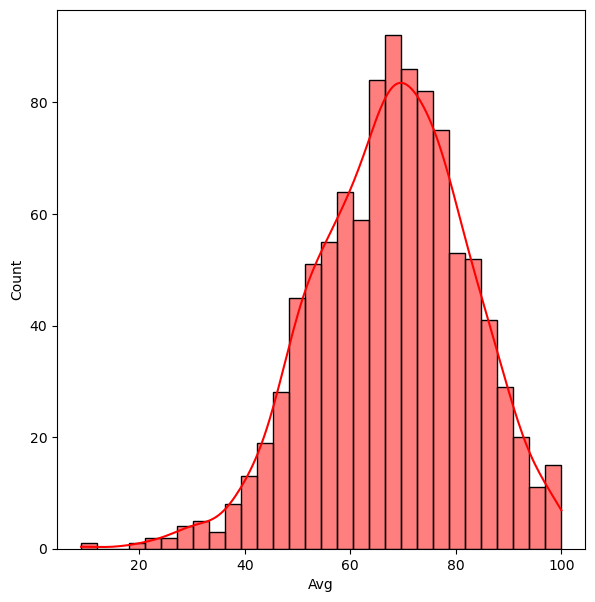

In [71]:
fig,axis = plt.subplots(1,figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x = "Avg", bins = 30, kde = True, color ="r")

<Axes: xlabel='Avg', ylabel='Count'>

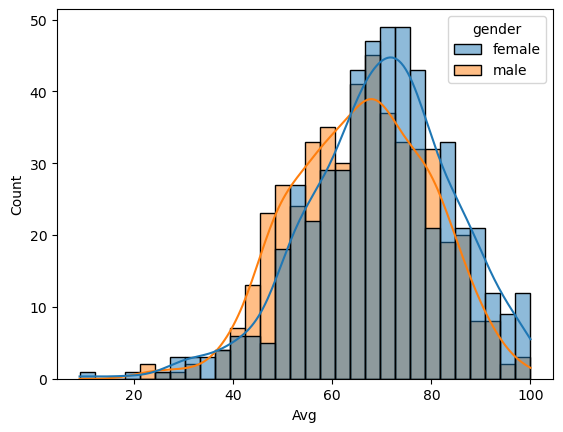

In [67]:
sns.histplot(data = df, x = "Avg", bins = 30 , kde = True, hue= "gender")

insights 
* Females students have performed well than male student

<Axes: xlabel='Avg', ylabel='Count'>

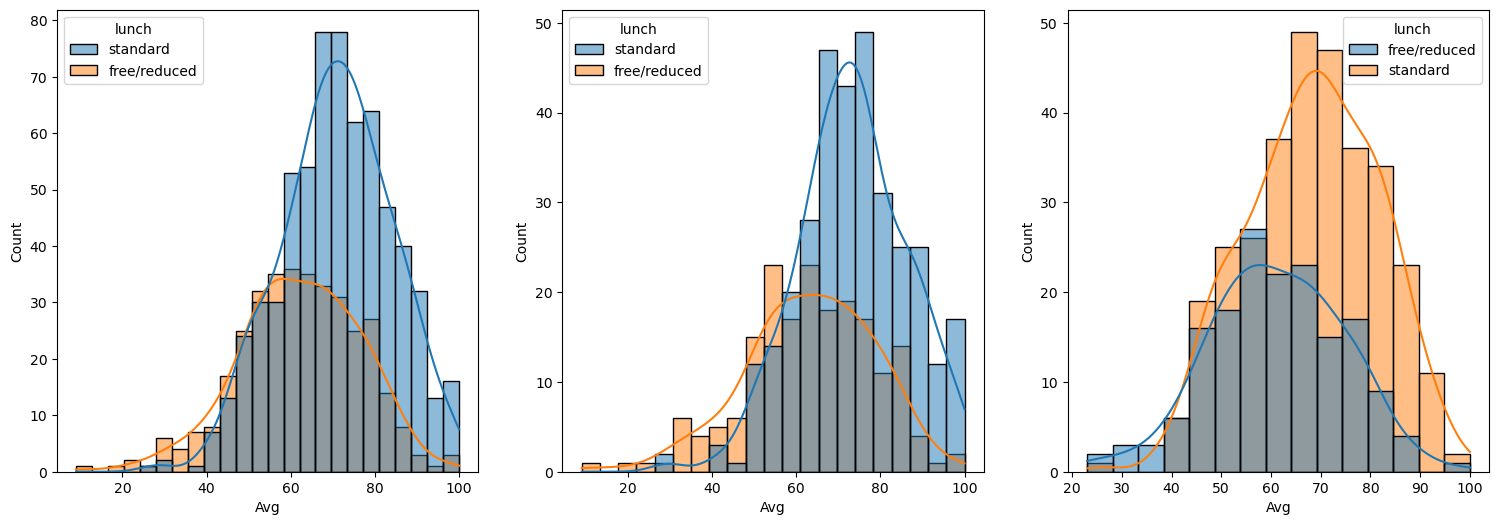

In [76]:
plt.subplots(1,3, figsize =(25,6))
plt.subplot(141)
sns.histplot(data = df, x = "Avg", kde = True , hue = "lunch")
plt.subplot(142)
sns.histplot(data = df[df.gender== "female"], x = "Avg", kde = True,  hue = "lunch")
plt.subplot(143)
sns.histplot(data = df[df.gender== "male"], x = "Avg", kde = True,  hue = "lunch")

Insights
* Standard Lunch help students perform well in exams
* Standard Lunch helps perform well in exam both males and females

<Axes: xlabel='Avg', ylabel='Count'>

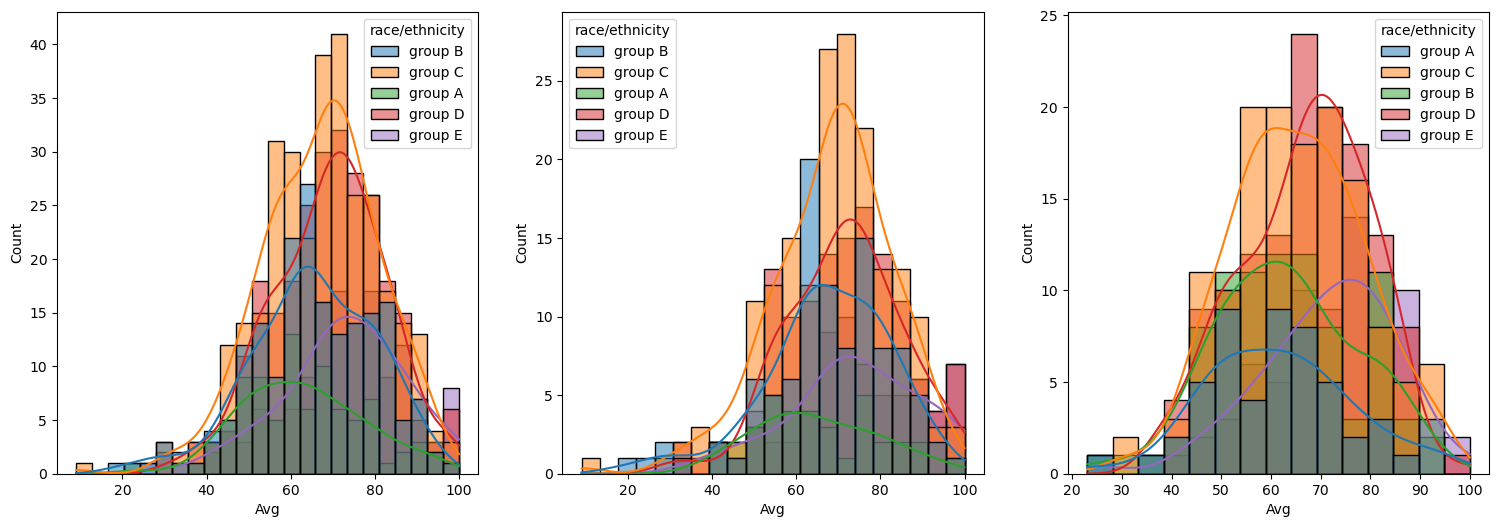

In [81]:
plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data= df, x = "Avg", kde = True, hue ="race/ethnicity")
plt.subplot(142)
sns.histplot(data = df[df.gender=="female"], x = "Avg", kde = True , hue = "race/ethnicity")
plt.subplot(143)
sns.histplot(data = df[df.gender =="male"], x = "Avg", kde = True, hue = "race/ethnicity")

Insights 
* Group C students proformed pretty good on avg and female category 
* Group D studens performed better in male category